# Intro to Neural Nets
Hypothesised in the 1940s

In this notebook, we will compare three dog breeds, using their age, weight and height. We wil build a neural net to classify the breeds of dogs based on these features.

In [3]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf 
import keras
print(f'Keras using {keras.backend.backend()} backend')
import pandas as pd
import numpy as np 
import matplotlib.pyplot as graph 
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
graph.rcParams['image.cmap'] = 'rainbow'

Using TensorFlow backend.
Keras using tensorflow backend


We begin by visualising our data

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/ms-learn-ml-crash-course-python/master/Data/dog_data.csv')
df.head(4)
print(df.shape)
features = df.drop(['breed'], axis=1)

(200, 4)


# Looking closer at our data

Our label has three categories of dogs: 0,1,2.

We need to convert this as the ML algo may misrepresent the relationship between these numbers. Hence, we need to represent our data as One-Hot vectors. 

In [8]:
from sklearn.preprocessing import OneHotEncoder

# create single array of target column
labels = np.array(df['breed'])
# build encoder and feed it our transposed array
encoded_data = OneHotEncoder(sparse = False).fit_transform(np.transpose([labels]))
print(encoded_data[:5])

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


Lets split our data into training & test.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, encoded_data, test_size=0.2)

# Lets build our model

- our first layer is our input layer, 3 nodes because we have 3 features
- second layer is our 1st hidden layer: lets try 4 nodes here
- third layer is our 2nd hidden layer: lets try 2 nodes here
- final layer: output layer, where we have 3 nodes for the 3 dog breeds

In [11]:
# set a random seed
np.random.seed(6)

#lets create our base model
model = keras.models.Sequential()

structure = [3, 4, 2, 3]

# lets add our first layer to our input layer
model.add(
    keras.layers.Dense(
        units=structure[1], 
        input_dim=structure[0], 
        activation='relu'
    )
)

# second layer
model.add(
    keras.layers.Dense(
        units=structure[2],
        activation='relu'
    )
)

# output layer using softmax 
model.add(
    keras.layers.Dense(
        units=structure[3],
        activation= tf.nn.softmax
    )
)

print(f'Layer structure: {structure}')

Layer structure: [3, 4, 2, 3]


You have successfuly created your first Neural Net! 

# Compile and check how good our model is

In [14]:
#Lets compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

print('Starting training...')

training_stats = model.fit(
    X_train, y_train, batch_size=1, epochs=24, verbose=0
)

print('Training done.')

print('Training evaluation: loss = %0.3f, accuracy = %0.2f%%'
        %(training_stats.history['loss'][-1],
        100* training_stats.history['accuracy'][-1])
)

Starting training...
Training done.
Training evaluation: loss = 0.489, accuracy = 68.12%


Lets plot the results

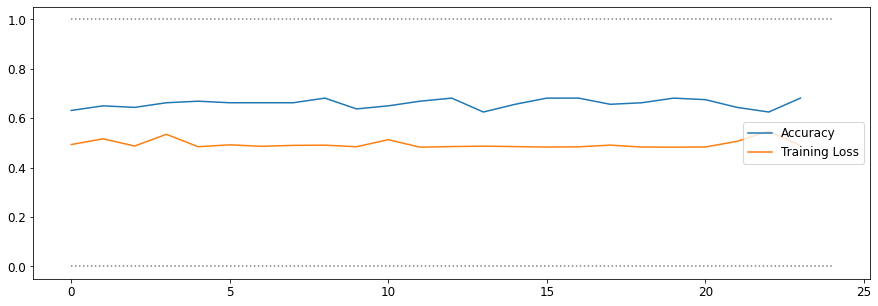

In [15]:
accuracy, = graph.plot(
    training_stats.history['accuracy'],
    label='Accuracy'
)
training_loss, = graph.plot(
    training_stats.history['loss'],
    label = 'Training Loss'
)

graph.legend(handles=[accuracy, training_loss])
loss = np.array(training_stats.history['loss'])
xp = np.linspace(0, loss.shape[0], 10*loss.shape[0])
graph.plot(xp, np.full(xp.shape, 1), c='k', linestyle=':', alpha=0.5)
graph.plot(xp, np.full(xp.shape, 0), c = 'k', linestyle = ':', alpha = 0.5)
graph.show()

Lets test our model on our test set

In [16]:
evaluation = model.evaluate(X_test, y_test, verbose =0)

print('test set evaluation: loss=%0.6f, accuracy=%0.2f' %(evaluation[0], 100*evaluation[1]))

test set evaluation: loss=0.534550, accuracy=57.50


In [20]:
new_sample = [9,7,7]

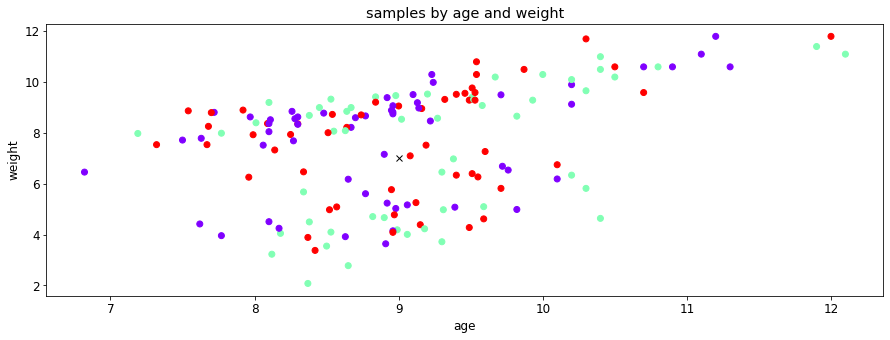

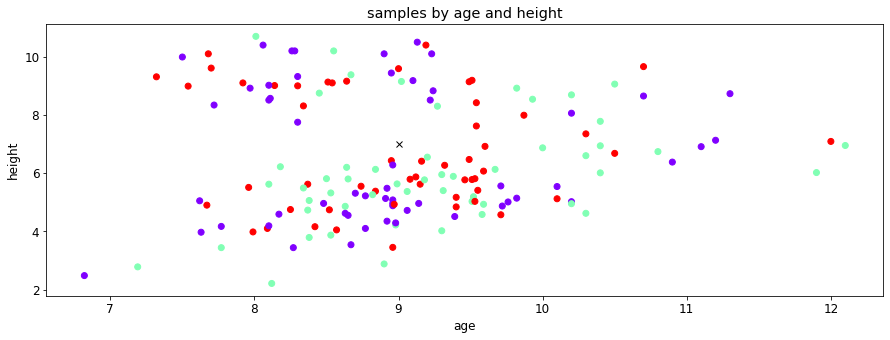

In [23]:
graph.plot(new_sample[0], new_sample[1], 'ko', marker='x')

graph.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c = labels[:160])
graph.title('samples by age and weight')
graph.xlabel('age')
graph.ylabel('weight')
graph.show()

# Plot out the age-height relationship

graph.plot(new_sample[0], new_sample[2], 'ko', marker='x')


graph.scatter(X_train.iloc[:,0], X_train.iloc[:,2], c = labels[:160])
graph.title('samples by age and height')
graph.xlabel('age')
graph.ylabel('height')
graph.show()

In [26]:
predicted = model.predict(np.array(new_sample).reshape(-1, 3))
print('Breed prediction for %s:' %(new_sample))
###

print(np.around(predicted[0],2))
print('Breed %s, with %i%% certainty.' %(np.argmax(predicted), np.round(100 * predicted[:, np.argmax(predicted)][0])))

Breed prediction for [9, 7, 7]:
[0.04 0.92 0.03]
Breed 1, with 92% certainty.
